In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


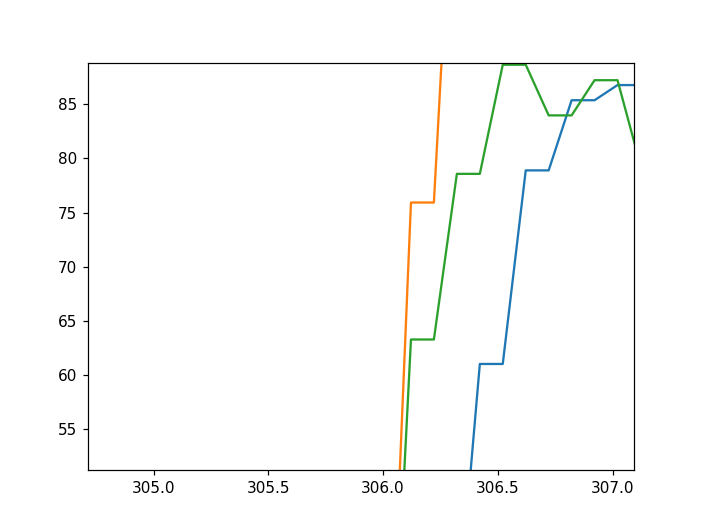

In [170]:
upslopes = [[3025,3055], [3080,3095], [3125,314], [3160,3190], [3205, 3240], [3260, 3280],
            [3305, 3325], [3345,3360], [3385, 3405], [3430, 3455], [3480, 3495], [3540, 3560]]
start = 3025
stop = 3562
pmtdata = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/PMT Counts.dir/01186 - PMT Counts.csv',delimiter=',')
time = pmtdata[start:stop][:,0]
REPUMP_ON = pmtdata[start:stop][:,1]
REPUMP_OFF = pmtdata[start:stop][:,2]
DIFF = (REPUMP_ON[1:] - REPUMP_OFF[:-1])
time_diff = time[1:]
plt.plot(time, REPUMP_OFF)
plt.plot(time, REPUMP_ON)
plt.plot(time_diff, DIFF)

In [148]:
up_x = []
up_y = []
for item in upslopes:
    start = item[0]
    stop = item[1]
    time = pmtdata[start:stop][:,0]
    REPUMP_OFF = pmtdata[start:stop][:,1]
    DIFF = pmtdata[start:stop][:,3]
    up_x += list(REPUMP_OFF)
    up_y += list(DIFF)
    plt.plot(time, REPUMP_OFF, time, DIFF)

<IPython.core.display.Javascript object>


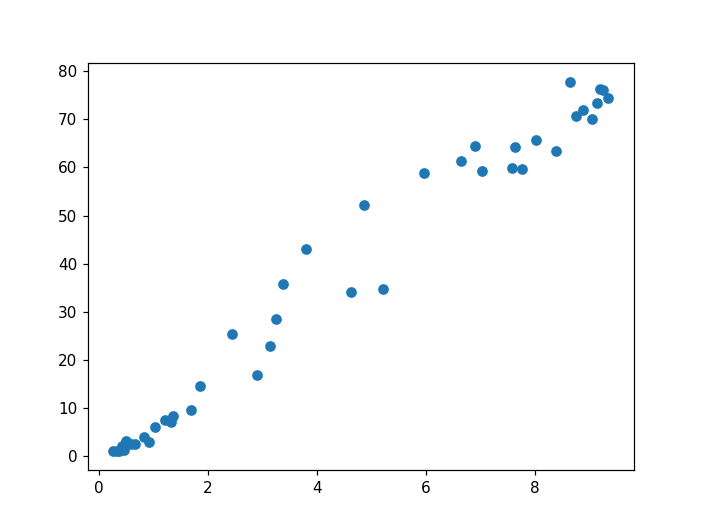

In [179]:
linx = np.linspace(0, 300, 100)
x, y = zip(*sorted(zip(np.sqrt(REPUMP_OFF), DIFF)))
newx, newy = coursen(x,y,12)
plt.scatter(newx, newy)
#plt.plot(np.sqrt(linx), 89*np.sin(0.11*np.sqrt(linx))**2, color = 'orange')

In [84]:
def coursen(xdata,ydata,points):
    newlength = int(len(xdata)/points)
    newxdata = []
    newydata = []
    j = 0
    for i in range(newlength):
        i = points*(i)
        newydata.append(np.mean(ydata[int(j):int(i)]))
        newxdata.append(xdata[int((i + j)/2)])
        j = i
    return newxdata, newydata